In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as skl
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [3]:
# file = 'Dataset/CSV files/kstrdplfeaturesreportoriginal-inintegralvalues.csv'

# df = pd.read_csv(file)
# df = df[df.Label_Desc == 'Benign type']
# shape = df.shape
# print(f"Shape = {shape}")

# df = df.drop(['filename','Label_Desc'], axis=1)
# df = df.fillna(0)
# df = df.astype(int)
# df.info()

In [4]:
# df.to_csv('real_benign.csv', index=False)

In [5]:
file = 'real_benign.csv'

real_df = pd.read_csv(file)
real_df

,fl_dur,tot_fw_pk,tot_bw_pk,tot_l_fw_pkt,fw_pkt_l_max,fw_pkt_l_min,fw_pkt_l_avg,fw_pkt_l_std,bw_pkt_l_max,bw_pkt_l_min,...,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min,fw_pkt_s,bw_pkt_s,pkt_size_avg,Label_code
0,3,4,2,256,64,64,64,0,72,72,...,0,0,0,0,0,0,1,36,33,0
1,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,13,13,34,0
2,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,16,16,34,0
3,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,21,21,34,0
4,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,42,42,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88338,2,3,3,192,64,64,64,0,72,72,...,0,2,1,1,2,0,2,2,34,0
88339,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,19,19,34,0
88340,1,3,3,192,64,64,64,0,72,72,...,0,1,0,0,1,0,4,4,34,0
88341,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,11,11,34,0


In [6]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88343 entries, 0 to 88342
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fl_dur         88343 non-null  int64
 1   tot_fw_pk      88343 non-null  int64
 2   tot_bw_pk      88343 non-null  int64
 3   tot_l_fw_pkt   88343 non-null  int64
 4   fw_pkt_l_max   88343 non-null  int64
 5   fw_pkt_l_min   88343 non-null  int64
 6   fw_pkt_l_avg   88343 non-null  int64
 7   fw_pkt_l_std   88343 non-null  int64
 8   bw_pkt_l_max   88343 non-null  int64
 9   bw_pkt_l_min   88343 non-null  int64
 10  bw_pkt_l_mean  88343 non-null  int64
 11  bw_pkt_l_std   88343 non-null  int64
 12  fw_fl_byt_s    88343 non-null  int64
 13  bw_fl_byt_s    88343 non-null  int64
 14  fw_fl_pkt_s    88343 non-null  int64
 15  bw_fl_pkt_s    88343 non-null  int64
 16  fw_iat_tot     88343 non-null  int64
 17  fw_iat_avg     88343 non-null  int64
 18  fw_iat_std     88343 non-null  int64
 19  fw_i

In [7]:
file_b = 'Aug_Dataset/aug_benign_1to8_3_20.csv'
file_c = 'aug_benign.csv'

aug_df = pd.read_csv(file_b)
aug_df

,fl_dur,tot_fw_pk,tot_bw_pk,tot_l_fw_pkt,fw_pkt_l_max,fw_pkt_l_min,fw_pkt_l_avg,fw_pkt_l_std,bw_pkt_l_max,bw_pkt_l_min,...,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min,fw_pkt_s,bw_pkt_s,pkt_size_avg,Label_code
0,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,12,12,34,1
1,1,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,5,5,34,1
2,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,25,25,34,1
3,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,9,9,34,1
4,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,9,9,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88338,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,13,13,34,1
88339,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,19,19,34,1
88340,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,6,6,34,1
88341,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,8,8,34,1


In [8]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88343 entries, 0 to 88342
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fl_dur         88343 non-null  int64
 1   tot_fw_pk      88343 non-null  int64
 2   tot_bw_pk      88343 non-null  int64
 3   tot_l_fw_pkt   88343 non-null  int64
 4   fw_pkt_l_max   88343 non-null  int64
 5   fw_pkt_l_min   88343 non-null  int64
 6   fw_pkt_l_avg   88343 non-null  int64
 7   fw_pkt_l_std   88343 non-null  int64
 8   bw_pkt_l_max   88343 non-null  int64
 9   bw_pkt_l_min   88343 non-null  int64
 10  bw_pkt_l_mean  88343 non-null  int64
 11  bw_pkt_l_std   88343 non-null  int64
 12  fw_fl_byt_s    88343 non-null  int64
 13  bw_fl_byt_s    88343 non-null  int64
 14  fw_fl_pkt_s    88343 non-null  int64
 15  bw_fl_pkt_s    88343 non-null  int64
 16  fw_iat_tot     88343 non-null  int64
 17  fw_iat_avg     88343 non-null  int64
 18  fw_iat_std     88343 non-null  int64
 19  fw_i

In [9]:
combined_df = pd.concat([real_df, aug_df], ignore_index=True) 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
X = combined_df.drop(columns=['Label_code'])
y = combined_df['Label_code']

In [11]:
X

,fl_dur,tot_fw_pk,tot_bw_pk,tot_l_fw_pkt,fw_pkt_l_max,fw_pkt_l_min,fw_pkt_l_avg,fw_pkt_l_std,bw_pkt_l_max,bw_pkt_l_min,...,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min,fw_pkt_s,bw_pkt_s,pkt_size_avg
0,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,7,7,34
1,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,9,9,34
2,2,3,3,192,64,64,64,0,72,72,...,2,0,2,1,2,2,0,1,1,34
3,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,94,94,34
4,1,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,5,5,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176681,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,19,19,34
176682,0,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,16,16,34
176683,1,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,5,5,34
176684,1,3,3,192,64,64,64,0,72,72,...,0,0,0,0,0,0,0,4,4,34


In [12]:
y

0         1
1         1
2         0
3         0
4         1
         ..
176681    1
176682    1
176683    1
176684    1
176685    1
Name: Label_code, Length: 176686, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Decision Tree

In [14]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6030064294122974

In [15]:
for i, score in enumerate(dt.feature_importances_):
    feature_name = real_df.columns[i]
    print(f"{feature_name}: {score}")

fl_dur: 0.0
tot_fw_pk: 0.0
tot_bw_pk: 0.0
tot_l_fw_pkt: 0.0
fw_pkt_l_max: 0.0
fw_pkt_l_min: 0.0
fw_pkt_l_avg: 0.0
fw_pkt_l_std: 0.0
bw_pkt_l_max: 0.0
bw_pkt_l_min: 0.0
bw_pkt_l_mean: 0.0
bw_pkt_l_std: 0.0
fw_fl_byt_s: 0.7267577663762137
bw_fl_byt_s: 0.02949680510114947
fw_fl_pkt_s: 0.0
bw_fl_pkt_s: 0.0
fw_iat_tot: 0.0
fw_iat_avg: 0.0
fw_iat_std: 0.0
fw_iat_max: 0.0
fw_iat_min: 0.0
bw_iat_tot: 0.0
bw_iat_avg: 0.0
bw_iat_std: 0.0
bw_iat_max: 0.20711024735504083
bw_iat_min: 0.0
fw_pkt_s: 0.0
bw_pkt_s: 0.03663518116759613
pkt_size_avg: 0.0


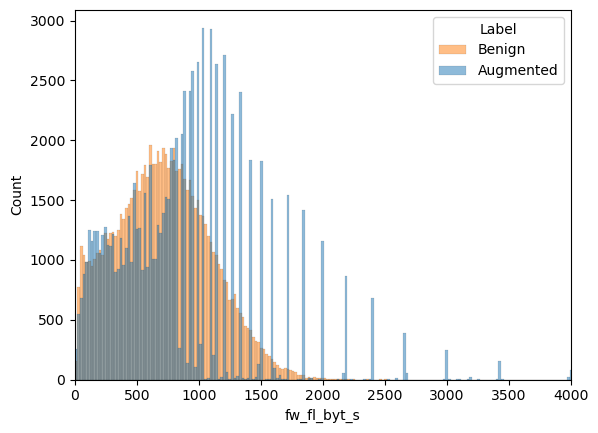

In [16]:
sns.histplot(data=combined_df, x="fw_fl_byt_s", hue="Label_code")
plt.legend(title="Label", labels=["Benign", "Augmented"])
plt.xlim(0, 4000)
plt.show()

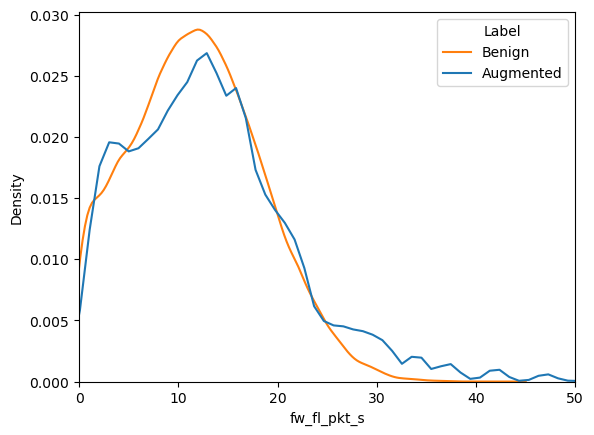

In [35]:
sns.kdeplot(data=combined_df, x="fw_fl_pkt_s", hue="Label_code")
plt.legend(title="Label", labels=["Benign", "Augmented"])
plt.xlim(0, 50)
plt.show()

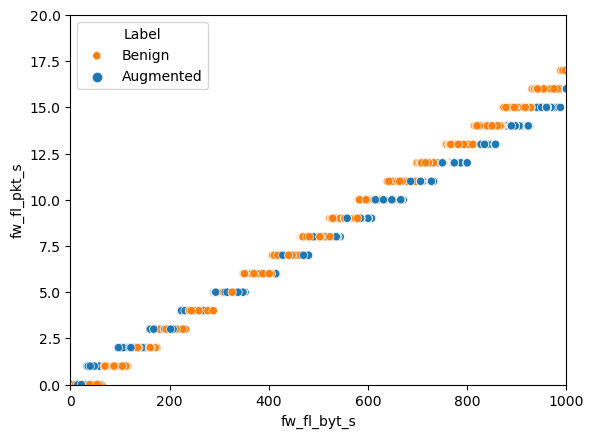

In [18]:
sns.scatterplot( x = "fw_fl_byt_s", 
                 y = "fw_fl_pkt_s", 
                 data = combined_df, 
                 hue = "Label_code")
plt.ylim(0, 20)
plt.xlim(0, 1000)
plt.legend(title="Label", labels=["Benign", "Augmented"])
plt.show()

In [19]:
# sns.pairplot(data=combined_df, hue="Label_code", height=3)

NB

In [20]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5350674635515711

MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9), activation='relu', solver='adam', max_iter=1000)
mlp = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

SVM

In [ ]:
svm =svm.SVC(gamma='scale',C =1.0)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy